In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uber=pd.read_csv(r"D:\PYTHON\COURSE-3-EDA&STASTISTICS\ASSIGNMENT\Uber Request Data.csv")
uber.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [4]:
#checking for any duplicate values in'Request id'
sum(uber.duplicated(subset='Request id'))==0

True

In [5]:
#checking for null values column wise
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
uber['Request timestamp']=uber['Request timestamp'].astype(str)
uber['Request timestamp']=uber['Request timestamp'].str.replace('/','-')
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'],dayfirst=True)

In [7]:
uber['Request timestamp'].head()

0   2016-07-11 11:51:00
1   2016-07-11 17:57:00
2   2016-07-12 09:17:00
3   2016-07-12 21:08:00
4   2016-07-13 08:33:16
Name: Request timestamp, dtype: datetime64[ns]

In [8]:
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'],dayfirst=True)
uber['Drop timestamp'].head()

0   2016-07-11 13:00:00
1   2016-07-11 18:47:00
2   2016-07-12 09:58:00
3   2016-07-12 22:03:00
4   2016-07-13 09:25:47
Name: Drop timestamp, dtype: datetime64[ns]

### converted 'Request timestamp' and 'Drop timestamp' into the required format using pd.to_datetime

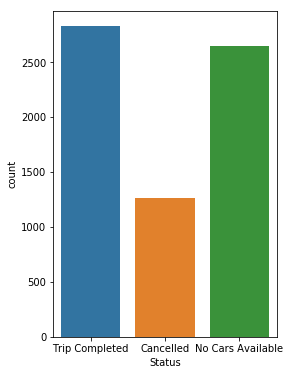

In [9]:
plt.figure(figsize=(4,6))
sns.countplot(x="Status",data=uber)
plt.show()

In [10]:
uber['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

# count of requests is plotted against 'Status'.It is apparent that combined total of 'no cars available' and 'cancelled' is more than 'trips completed'

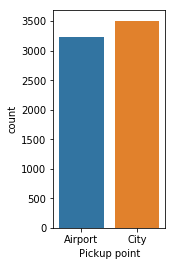

In [11]:
plt.figure(figsize=(2,4))
sns.countplot(x="Pickup point",data=uber)
plt.show()

In [12]:
uber['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

# count of requests is plotted against Pickup points,number of request differ by less amount.

In [13]:
uber.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [14]:

uber['pickup hour']=uber['Request timestamp'].dt.hour

# created different column hour of day to facilitate analysis

In [15]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
pickup hour          6745 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 368.9+ KB


# now analyzing problems for uber

C:\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


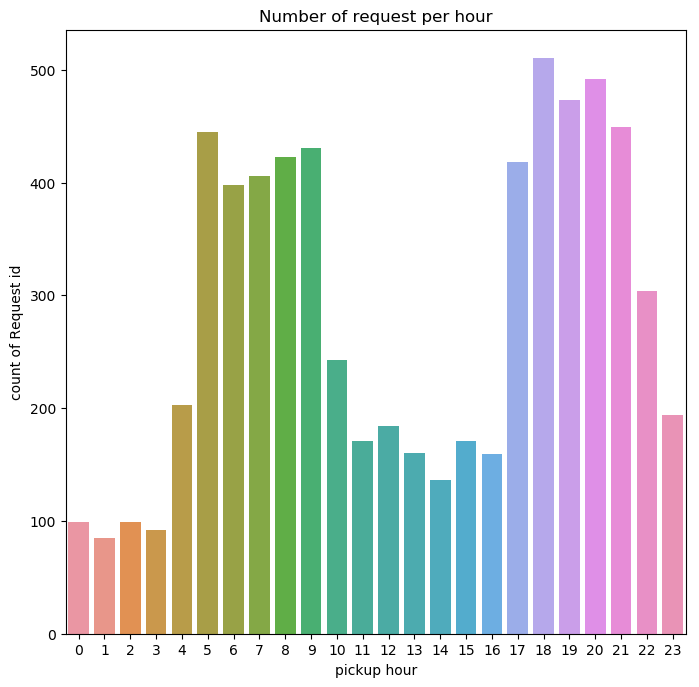

In [16]:
plt.figure(num=None, figsize=(8,8), dpi=100 )
sns.barplot(x='pickup hour',y='Request id',data=uber,estimator=len)
plt.title("Number of request per hour")
plt.ylabel("count of Request id")
plt.show()

## from the graph it is evident that max requests are made between 0500 hours-1000 hours in the morning and 1700 hours -2200 hours in the evening

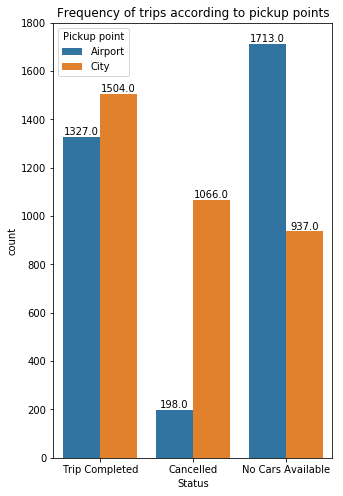

In [17]:
plt.figure(figsize=(5,8))
fig1=sns.countplot(x='Status',hue='Pickup point',data=uber)
fig1.set_title("Frequency of trips according to pickup points")
ncount=len(uber)
for p in fig1.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig1.annotate((y),(x.mean(),y),ha='center',va='bottom')
plt.show()

### we can see the relative proportion of trips ie when the trip is completed,when 
### it is cancelled and when there was no car available for both city and airport
### while 'trips completed' status is greater in city and 'no cars available' status is higher in   
### airport location.

In [18]:
uber['Timeslot']=pd.cut(uber['pickup hour'],bins=[0,3,10,15,20,22,24],labels=["Early Morning","Morning","Afternoon","Evening","Night","Late Night"])

## using pd.cut function to create a new column 'Timeslot' from 'pickup hour'
## and created bins for different timeslots of morning etc according to time.

In [19]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,pickup hour,Timeslot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


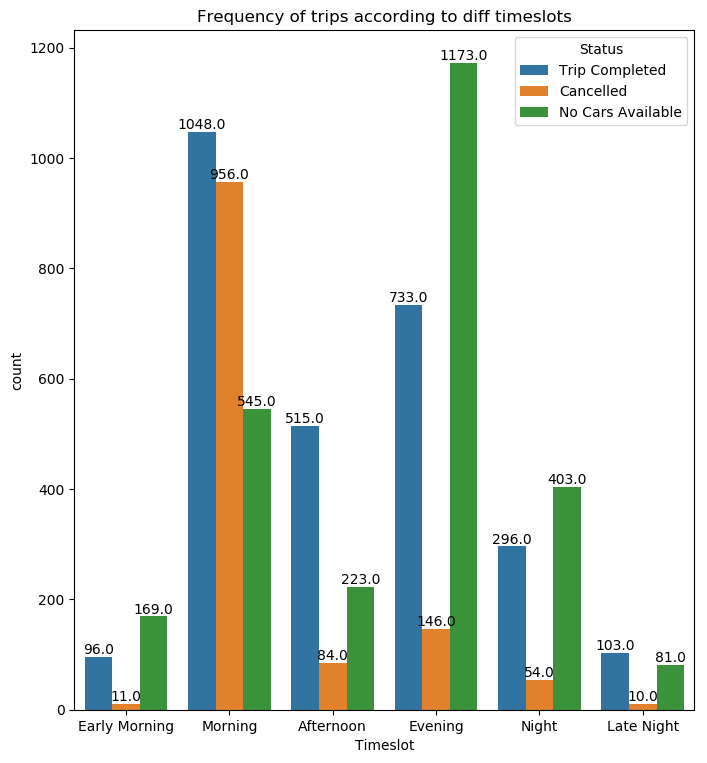

In [20]:
plt.figure(figsize=(8,9),dpi=100)
fig2=sns.countplot(x='Timeslot',hue='Status',data=uber)
fig2.set_title("Frequency of trips according to diff timeslots")
ncount=len(uber)
for p in fig2.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig2.annotate((y),(x.mean(),y),ha='center',va='bottom')
plt.show()

## graph showing relative proportion of trips according to timeslots
## no cars available is high during evening  (from 1500 hours -2000 hours) and 
## cancellation and trips completed is high during morning(from 0300 hours -1000 hours)

In [21]:
hour_pivot_df=uber.pivot_table(values=['Request id'],index=['pickup hour','Pickup point','Status'],aggfunc='count')
hour_pivot_df

Request id
pickup hour Pickup point Status                       
0           Airport      No Cars Available          30
                         Trip Completed             23
            City         Cancelled                   3
                         No Cars Available          26
                         Trip Completed             17
1           Airport      No Cars Available          29
                         Trip Completed             13
            City         Cancelled                   4
                         No Cars Available          27
                         Trip Completed             12
2           Airport      No Cars Available          25
                         Trip Completed             16
            City         Cancelled                   5
                         No Cars Available          32
                         Trip Completed             21
3           Airport      No Cars Available          30
                         Trip Completed             15
            City         Cancelled                   2
                         No Cars Available          26
                         Trip Completed             19
4           Airport      Cancelled                   2
                         No Cars Available          34
                         Trip Completed             36
            City         Cancelled                  49
                         No Cars Available          40
                         Trip Completed             42
5           Airport      Cancelled                   4
                         No Cars Available           3
                         Trip Completed             85
            City         Cancelled                 172
...                                                ...
18          City         Trip Completed             83
19          Airport      Cancelled                  15
                         No Cars Available         268
                         Trip Completed             83
            City         Cancelled                   9
                         No Cars Available          15
                         Trip Completed             83
20          Airport      Cancelled                  29
                         No Cars Available         275
                         Trip Completed             74
            City         Cancelled                  12
                         No Cars Available          15
                         Trip Completed             87
21          Airport      Cancelled                  28
                         No Cars Available         254
                         Trip Completed             61
            City         Cancelled                  14
                         No Cars Available          11
                         Trip Completed             81
22          Airport      Cancelled                   3
                         No Cars Available         100
                         Trip Completed             80
            City         Cancelled                   9
                         No Cars Available          38
                         Trip Completed             74
23          Airport      No Cars Available          36
                         Trip Completed             62
            City         Cancelled                  10
                         No Cars Available          45
                         Trip Completed             41

[139 rows x 1 columns]

## hourwise breakup of 'status' ie trips completed,cancellations and no cars available for both c'pickup points' ie city and airport 

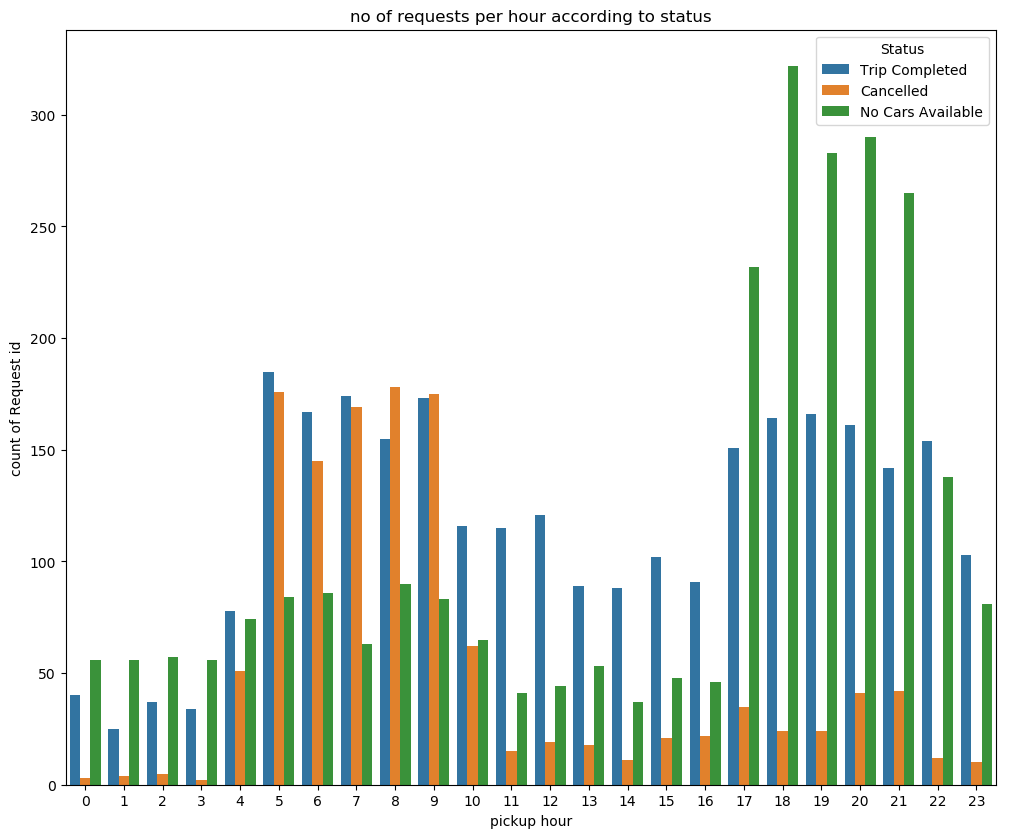

In [22]:
#now plotting for requests per hour according to status 
plt.figure(figsize=(12,10),dpi=100,facecolor='w',edgecolor='k')
sns.barplot(x='pickup hour',y='Request id',hue='Status',data=uber,estimator=len)
plt.title("no of requests per hour according to status")
plt.ylabel("count of Request id")
plt.show()

## from the graph it is evident that max no of requests that are made between 5-10 am are cancelled and max no of requests between 5-10 pm in night show 'no cars available'

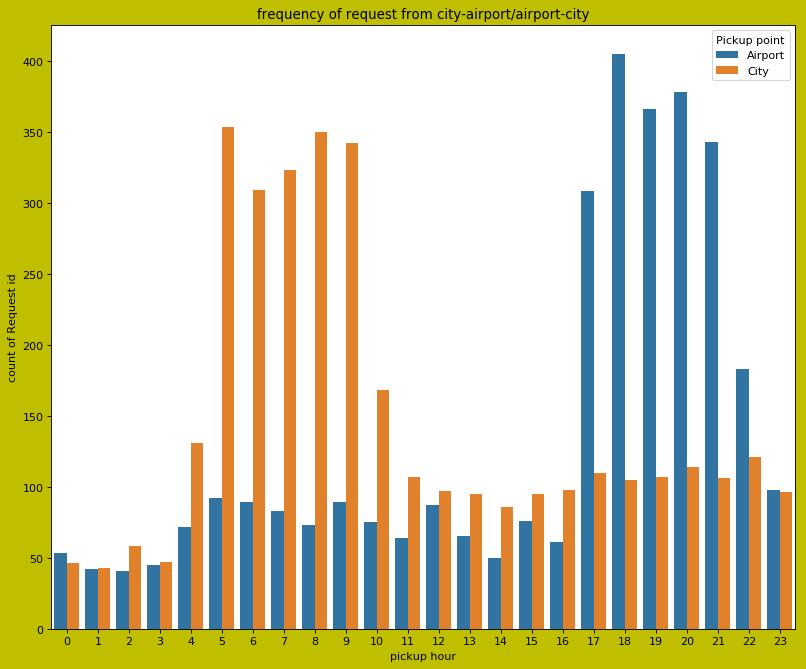

In [23]:
#plot of no. of requests from city to airport/airport to city
plt.figure(figsize=(12,10),dpi=80,facecolor='y',edgecolor='k')
sns.barplot(x='pickup hour', y='Request id', hue='Pickup point',data=uber, estimator=len)
plt.title("frequency of request from city-airport/airport-city")
plt.ylabel("count of Request id")
plt.show()

## no of request from city to airport is max between 5-10 am in the morning and no of requests from airport to city is max between 1700 hours-2200 hours 

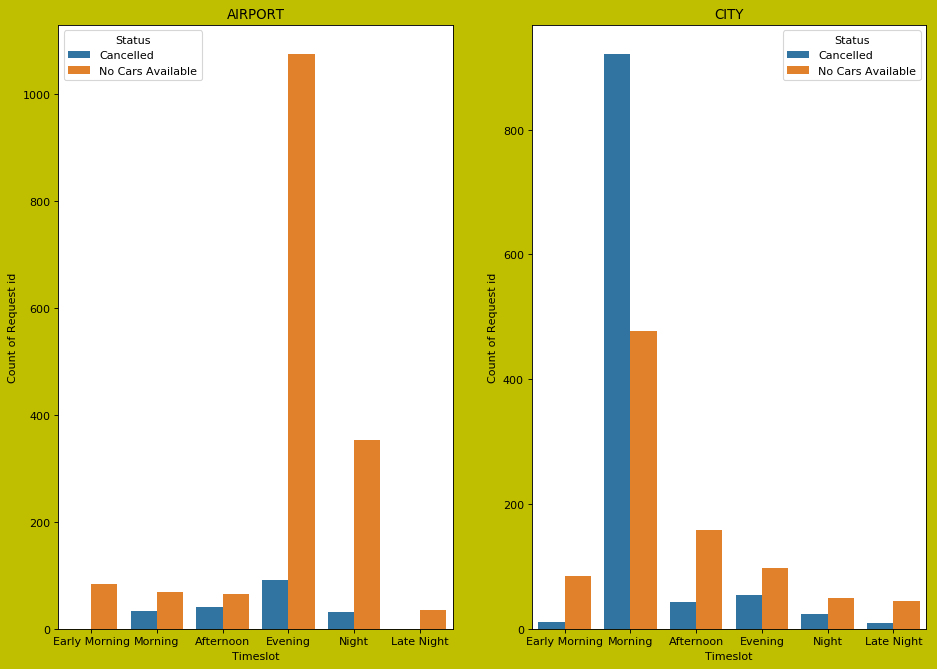

In [24]:
#plots of frquency of request
plt.figure(figsize=(14,10),dpi=80,facecolor='y',edgecolor='k')
plt.subplot(1,2,1)
sns.barplot(x='Timeslot',y='Request id',hue='Status',data=uber[(uber['Pickup point']=='Airport')&
(uber['Status']!='Trip Completed')],estimator=len)
plt.title("AIRPORT")
plt.ylabel("Count of Request id")


plt.subplot(1,2,2)
sns.barplot(x='Timeslot',y='Request id',hue='Status',data=uber[(uber['Pickup point']=='City')&
(uber['Status']!='Trip Completed')],estimator=len)
plt.title("CITY")
plt.ylabel("Count of Request id")
plt.show()

## creating demand and supply and gap between them.Demand= Trips completed+cancellation+no cars available and supply is the trips which were completed . So supply=Trips completed

In [25]:
# creating demand ,supply and gap between them according to timeslots
df=pd.DataFrame(uber.groupby(by='Timeslot',as_index=False)['Request id'].count())
df.columns.values[1]='Demand'
df_1=uber[uber.Status=='Trip Completed'].groupby(by='Timeslot',as_index=False)['Request id'].count()
df_1.columns.values[1]='Supply'
df['Supply']=df_1['Supply']
df['Gap']=df['Demand']-df['Supply']

In [26]:
df

,Timeslot,Demand,Supply,Gap
0,Early Morning,276,96,180
1,Morning,2549,1048,1501
2,Afternoon,822,515,307
3,Evening,2052,733,1319
4,Night,753,296,457
5,Late Night,194,103,91


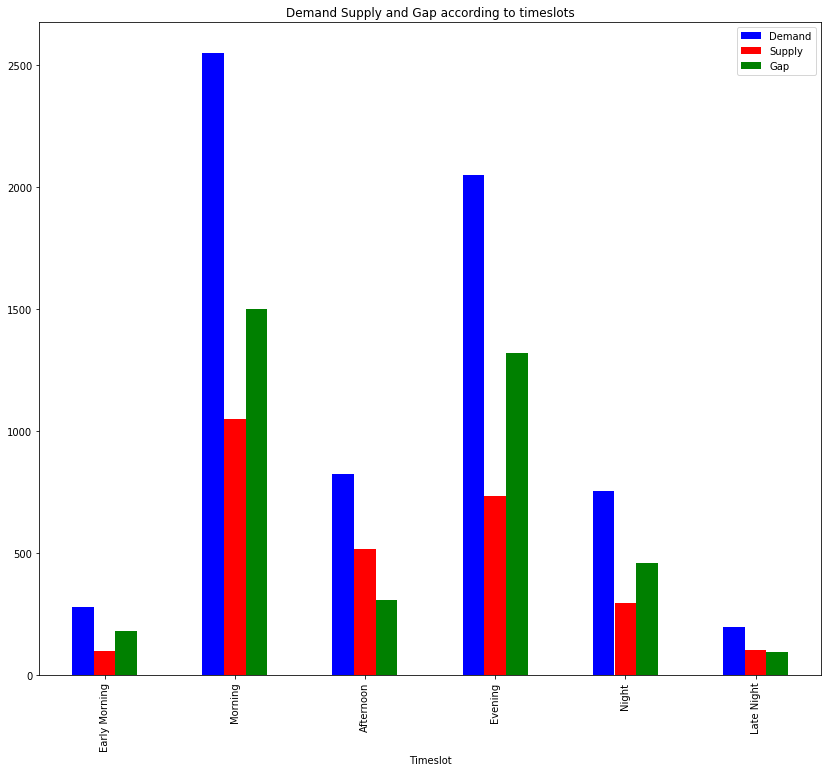

In [27]:
# plot showing demand ,supply and gap between them according to timeslot
df.plot(x='Timeslot', y=['Demand','Supply','Gap'], kind='bar',figsize=(14,12), color=['blue','red','green'],
        title="Demand Supply and Gap according to timeslots")
plt.show()

## from the graph it is clear that a huge gap exists between demand and supply in the 'morning and 'evening timeslots

In [28]:
#creating columns for demand,suply and gap according to timeslots for airport
df_Airport=uber[uber['Pickup point']=='Airport']
df_A=pd.DataFrame(df_Airport.groupby(by='Timeslot', as_index=False)['Request id'].count())
df_A.columns.values[1]='Demand'
df_2=df_Airport[df_Airport.Status=='Trip Completed'].groupby(by='Timeslot',as_index=False)['Request id'].count()
df_2.columns.values[1]='Supply'
df_A['Supply']=df_2['Supply']
df_A['Gap']=df_A['Demand']-df_A['Supply']


In [29]:
df_A

,Timeslot,Demand,Supply,Gap
0,Early Morning,128,44,84
1,Morning,573,471,102
2,Afternoon,342,236,106
3,Evening,1518,350,1168
4,Night,526,141,385
5,Late Night,98,62,36


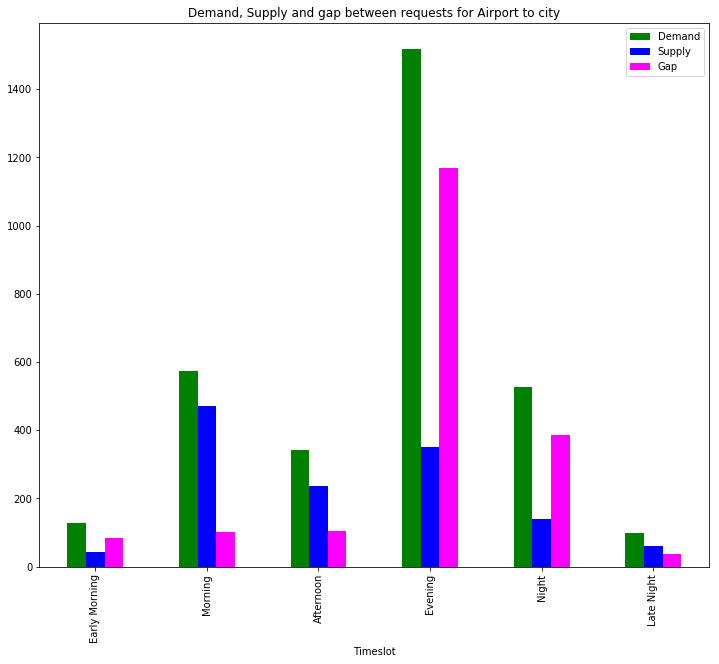

In [30]:
#plot showing demand ,supply and gap between them for airport
df_A.plot(x='Timeslot',y=['Demand','Supply','Gap'],kind='bar',figsize=(12,10),color=['green','blue','magenta'],
         title="Demand, Supply and gap between requests for Airport to city")
plt.show()

## it is evident from the graph that the gap is highest for evening and night timeslots 

In [31]:
# now creating demand ,suopply and gap between them for city
df_City=uber[uber['Pickup point']=='City']
df_C=pd.DataFrame(df_City.groupby(by='Timeslot', as_index=False)['Request id'].count())
df_C.columns.values[1]='Demand'
df_3=df_City[df_City.Status=='Trip Completed'].groupby(by='Timeslot',as_index=False)['Request id'].count()
df_3.columns.values[1]='Supply'
df_C['Supply']=df_3['Supply']
df_C['Gap']=df_C['Demand']-df_C['Supply']


In [32]:
df_C

,Timeslot,Demand,Supply,Gap
0,Early Morning,148,52,96
1,Morning,1976,577,1399
2,Afternoon,480,279,201
3,Evening,534,383,151
4,Night,227,155,72
5,Late Night,96,41,55


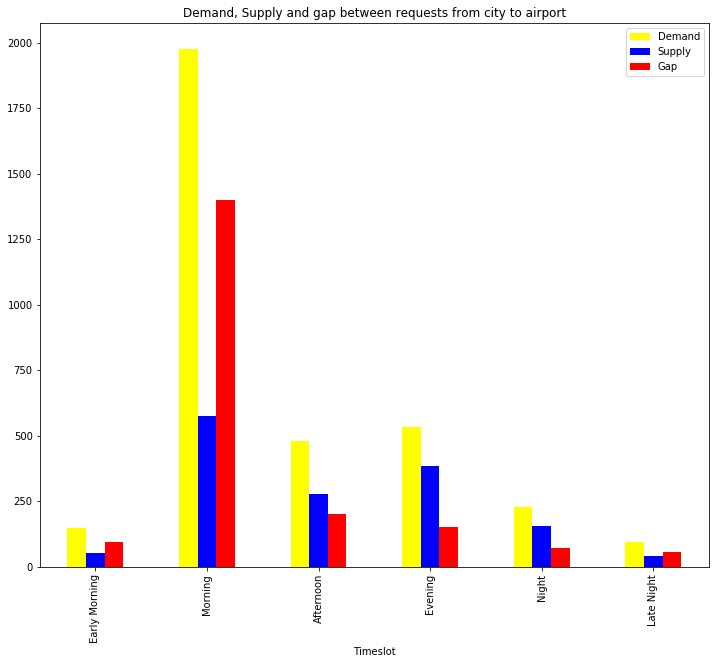

In [33]:
#plot showing demand ,supply and gap between them for city
df_C.plot(x='Timeslot',y=['Demand','Supply','Gap'],kind='bar',figsize=(12,10),color=['yellow','blue','red'],
         title="Demand, Supply and gap between requests from city to airport")
plt.show()

## it is evident from the graph that maximum of requests in the morning timeslot go unmet and hence a huge gap can be seen there

In [34]:
uber.to_csv(r'Desktop\UBER_NEW.csv')

In [35]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,pickup hour,Timeslot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,Morning
